# Project: Analysis of TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will show my analysis of the TMDb Movie Data file. The data in the TMDb file trigger some interesting questions for exploration. Since movie-making is a business, most of the following questions are specific to revenue, profit, and seeing if the data can help predict the financial success of a movie: 

- Which genres are most popular from year to year?
- Which directors are the most prolific and does this affect their profitability?
- How common is it to make large amounts of revenue on low to mid budget movies?
- Which production companies produce the most movies?
- What is the ROI (return on investment) and profit for each film?
- How do budget and revenue compare over the years?
- How are average profits trending over the years?
- What are the most popular movies sorted by release year and popularity?
- What are the highest occurrences of cast members and directors in the top most popular movies?
- Which movie has the highest/lowest budget?
- Which movie has the highest/lowest revenue?
- Which movie have the highest/lowest profit?
- How does profit compare to budget amount over the years?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt #pyplot specific import statement due to error message when labeling

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

The file contains 10,866 records for movies that were released between 1960 and 2015.  Each movie is listed with associated budget and revenue (as well as an inflation adjusted 2010 budget and revenue).  Some of the other data fields include: popularity, title, genre, cast, director, production company, and release date.


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')
pd.options.display.float_format = '{:.0f}'.format #suppress scientific notation
df.info() #what is the structure of the data?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
df.head() #print out sample of data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893
1,76341,tt1392190,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292
2,262500,tt2908446,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025
3,140607,tt2488496,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130
4,168259,tt2820852,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801


In [4]:
df.isnull().sum() #what is the number of nulls per data field?


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning

There are 5,696 records that have a zero dollar amount listed as their budget and revenue.  This could be because they were small/indie films or because the data was not available.  In some cases, the movie is a major/popular movie and the budget/revenue data is available if you do a wikipedia search (e.g. Smokey and the Bandit), but this budget amount is not reflected in the data. It would be be too burdensome to search for each of the 5,696 budget amounts, so I am going to replace these zeros with null.  Also, there are 10 imdb_id's missing, but since I am not using this field for my analysis, I am not concerned with it. 

### Duplicates
There is one duplicate column that needs to be removed.

In [5]:
sum(df.duplicated()) #how many duplicates are there?
df.drop_duplicates(inplace=True) #eliminate duplicates
sum(df.duplicated()) #confirm duplicate deletion

0

### Remove Columns

Some columns such as ID, IMDB_ID, homepage, etc. are not necessary for my analysis, so I will remove them to tidy up the data. Also, to do an apples-to-apples comparison, I am going to use the inflation adjusted dollar amounts (budget_adj and revenue_adj), so I will remove the original budget and revenue amounts.

In [6]:
#create list of columns to remove
remove_column = ['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview']

#remove columns
df = df.drop(remove_column,1)

#show new data frame columns
df.head()


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801


### Replace Zero Budget and Revenue Values With Null

To prevent skewing of statistics on budget and revenue due to zero values in these fields, I am going to replace these zeros will null values.

In [7]:
#replace zero budget and revenue values with null  
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)

# confirm zeros replace with null
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### General Statistics

In [8]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865,10865,10865,10865,10865,5169,4849
mean,1,102,217,6,2001,36889069,115100888
std,1,31,576,1,13,41960958,198855668
min,0,0,10,2,1960,1,2
25%,0,90,17,5,1995,8102293,10465848
50%,0,99,38,6,2006,22715052,43956661
75%,1,111,146,7,2011,50083840,131648236
max,33,900,9767,9,2015,425000000,2827123750


### Average Budget

The average inflation adjusted budget is $36,889,069

### Average Revenue

The average inflation adjusted revenue is $115,100,888

### Popularity - Which genres are most popular from year to year?

The most popular genres are drama and comedy.

In [9]:
#What are the most popular genres?
genres = df['genres'].value_counts().head(10)

print(genres)

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64


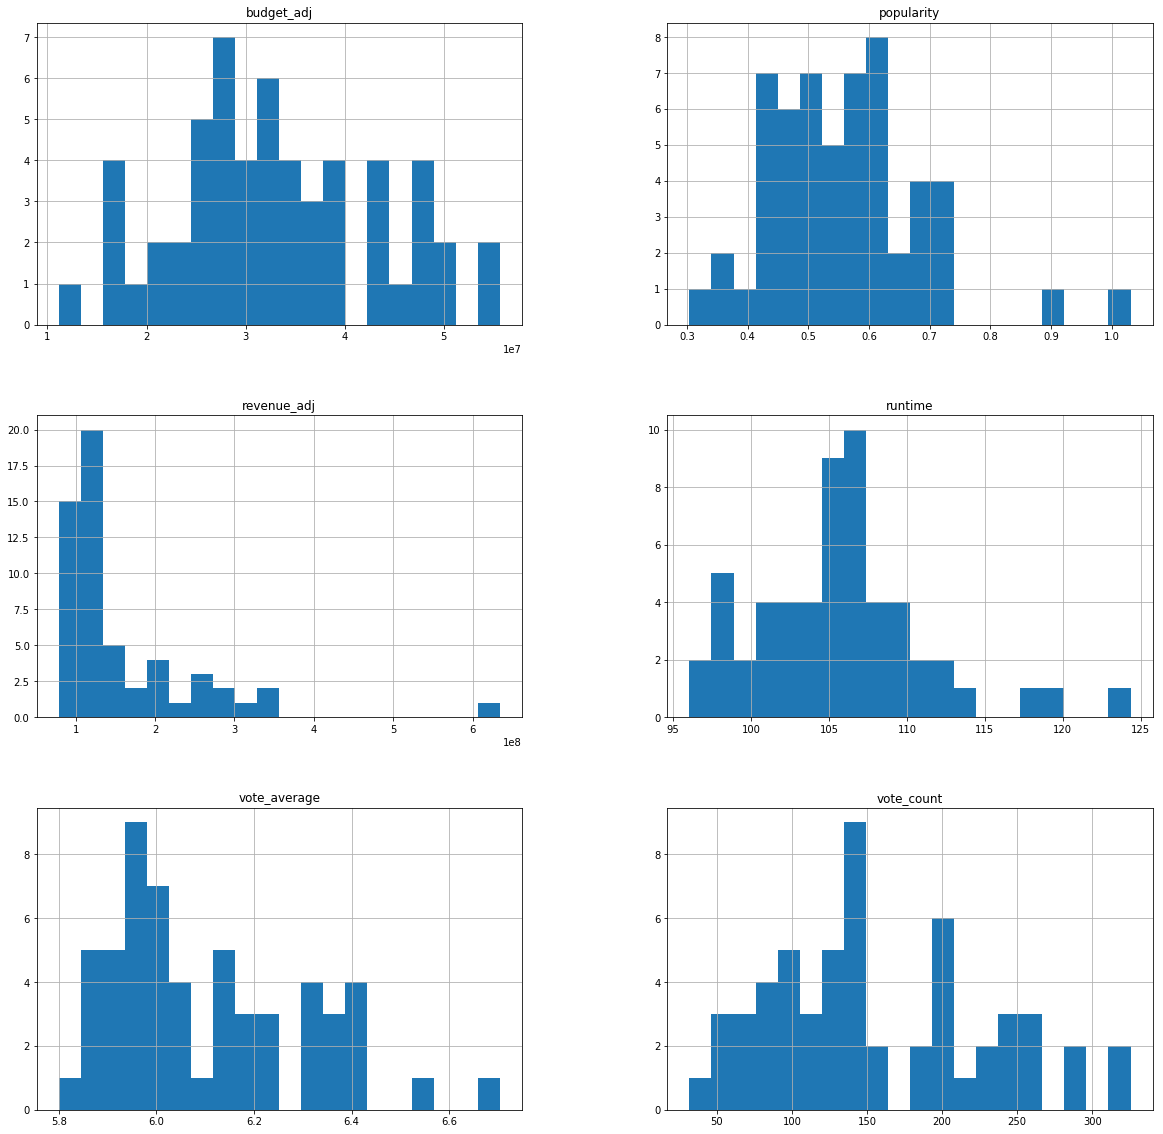

In [10]:
#create new dataframe grouped by release year and show histograms for the various attributes
df_new = df.groupby('release_year').mean()

df_new.hist(figsize=(20,20 ), bins=20);

### Which directors are the most prolific and does this affect their profitability?

In [11]:
df['director'].value_counts().head(20) #who are the top 20 most prolific directors?

Woody Allen             45
Clint Eastwood          34
Steven Spielberg        29
Martin Scorsese         29
Ridley Scott            23
Steven Soderbergh       22
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Barry Levinson          19
Wes Craven              19
Tim Burton              19
John Carpenter          18
Rob Reiner              18
David Cronenberg        18
Mike Nichols            18
Tyler Perry             17
Francis Ford Coppola    17
Stephen Frears          17
Robert Zemeckis         17
Name: director, dtype: int64

Woody Allen is the most prolific director

### Comparing Directors

When we look at the budget and revenue averages for Woody Allen's films, they cost about half that of the average movie and make about half the revenue (yet are still significantly profitable with over 40 million dollars in average profit). In contrast, James Cameron is not in the top 20 list of most prolific directors, but his movies generate immense profits ($787 million on average). It appears that being extremely prolific does not guarantee large profits. Also, most of Woody Allen's films fall within the mid-budget Comedy genre which may not be as profitable as other genres such as blockbuster Action/Adventure which are James Cameron's specialty.

In [12]:
#woody allen stats
df.query('director == "Woody Allen"').mean()

popularity            1
runtime              96
vote_count          164
vote_average          6
release_year       1993
budget_adj     18480601
revenue_adj    58828200
dtype: float64

In [13]:
#james cameron stats
df.query('director == "James Cameron"').mean()

popularity             3
runtime              121
vote_count          2178
vote_average           7
release_year        1993
budget_adj     114554680
revenue_adj    915902607
dtype: float64

### How common is it to make large amounts of revenue on low to mid budget movies? 

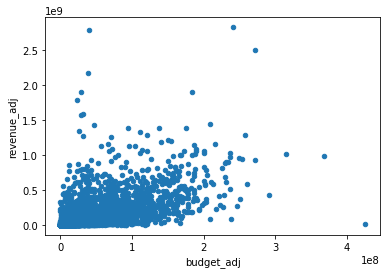

In [14]:
df.plot(x='budget_adj', y='revenue_adj', kind='scatter');

Only a few outlier films make dramatically more than they cost to produce

### Which production companies produce the most movies?

In [15]:
df['production_companies'].value_counts().head(20) #who are the top 20 production companies?

Paramount Pictures                          156
Universal Pictures                          133
Warner Bros.                                 84
Walt Disney Pictures                         76
Metro-Goldwyn-Mayer (MGM)                    72
Columbia Pictures                            72
New Line Cinema                              61
Touchstone Pictures                          51
20th Century Fox                             50
Twentieth Century Fox Film Corporation       49
TriStar Pictures                             45
Orion Pictures                               42
Miramax Films                                32
DreamWorks Animation                         31
Columbia Pictures Corporation                31
Pixar Animation Studios                      30
Walt Disney Productions                      29
Dimension Films                              28
United Artists                               23
Imagine Entertainment|Universal Pictures     22
Name: production_companies, dtype: int64

### What is the percentage ROI and profit for each film? 

In [16]:
#What is the percent ROI for each film?
df['ROI'] = df.apply(lambda row: row.revenue_adj / row.budget_adj, axis=1)
df['ROI'] = df['ROI'].map('{:,.1f}'.format)

#previewing the changes in the dataset
df.head(2)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI
0,33,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893,10.1
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292,2.5


In [17]:
#What is the profit for each film?
df['profit'] = df.apply(lambda row: row.revenue_adj - row.budget_adj, axis=1)
df

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI,profit
0,33,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893,10.1,1254445953
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292,2.5,210161353
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025,2.7,170419070
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130,10.3,1718723211
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801,7.9,1210948878
5,9,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7,2015,124199945,490314247,3.9,366114302
6,9,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,6,2015,142599937,405355076,2.8,262755138
7,8,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,8,2015,99359956,547749654,5.5,448389698
8,7,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6,2015,68079970,1064192017,15.6,996112047
9,6,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8,2015,160999929,785411575,4.9,624411646


### How do budget and revenue compare over the years?

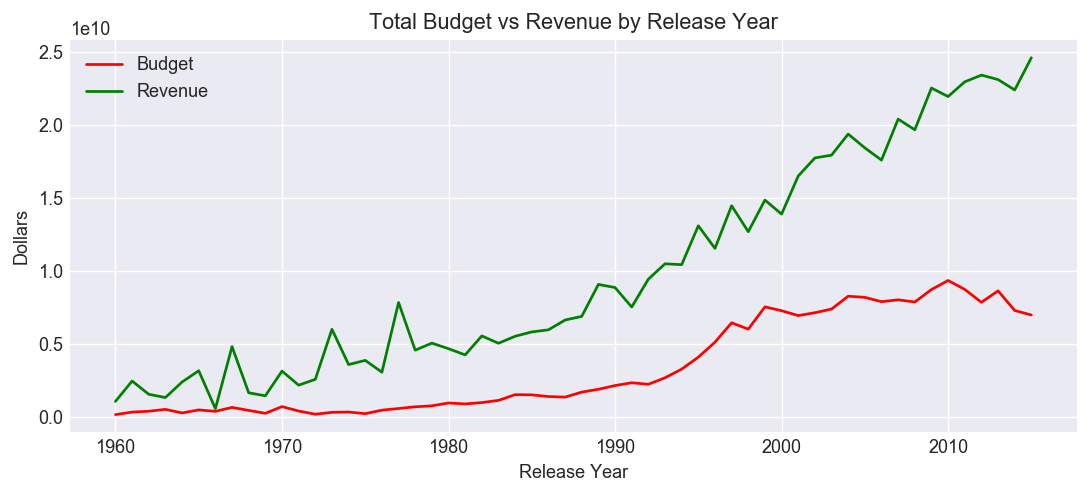

In [30]:
#compare sum of movie budget vs sum of movie profits by year

annual_budget = df.groupby('release_year')['budget_adj'].sum()
annual_revenue = df.groupby('release_year')['revenue_adj'].sum()

#figure size(width, height)
plt.figure(figsize=(10,4), dpi = 130)

#label x-axis
plt.xlabel('Release Year', fontsize = 10)
#label y-axis
plt.ylabel('Dollars', fontsize = 10)

#plot title
plt.title('Total Budget vs Revenue by Release Year')

#plot graph
#plt.plot(annual_profit)
plt.plot(annual_budget, color='red', label='Budget')
plt.plot(annual_revenue, color='green', label='Revenue')

#displaying the line plot
plt.legend(loc='upper left')
plt.show();


Since the late 90s/early 2000s, budgets have been fairly steady and flat.  In contrast, the revenues generated have been trending up resulting in larger profits. This may be because, in recent years, studios have placed a larger emphasis on more lucrative frachise action films (Star Wars, Marvel Comic franchises, etc.).

### How are average profits trending over the years?

First, let's look at the number of movies being produced since the 1960s.  The chart below shows that the number of movies being produced has significantly increased since the mid 1990s.  This could be due to the advent of digital movie production technology and the fact that movie making equiqment is far cheaper and easier to acquire by the average person.

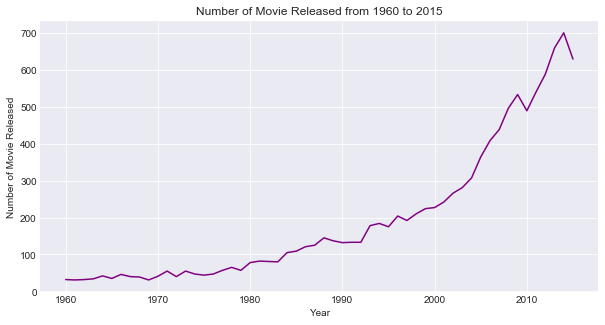

In [44]:
movie_count = df.groupby('release_year').count()['original_title']
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'purple')
#set title and labels
plt.title('Number of Movie Released from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

When we look at the average profits per year though, it looks like they have been trending down and fairly flat since the 1990s.  Is this because there are far more movies being produced (due to the democratization of movie making technology), but most of these movies are not producting vast profits, thereby dragging the overall average profits per year down? 

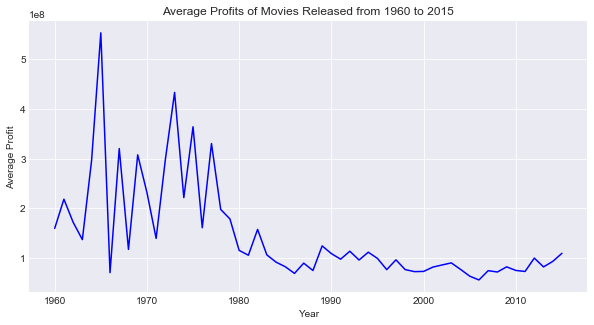

In [46]:
movie_profit = df.groupby('release_year').mean()['profit']
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_profit.index
# y is number of movie released
y = movie_profit
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'blue')
#set title and labels
plt.title('Average Profits of Movies Released from 1960 to 2015')
plt.xlabel('Year')
plt.ylabel('Average Profit');

### What are the most popular movies sorted by release year and popularity?

In [19]:
# what are the most popular movies sorted by release year and popularity?
df_top = df.sort_values(['release_year','popularity'], ascending=[True, False])

#group by year and choose the top 5 most popular
df_top = df_top.groupby('release_year').head(5).reset_index(drop=True)

#confirm values are order correctly by year and popularity
df_top.head(10)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,ROI,profit
0,3,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8,1960,5949601,235934959,39.7,229985357
1,2,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7,1960,14745935,36164405,2.5,21418470
2,1,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,197,Action|Drama|History,Bryna Productions,10/6/60,211,7,1960,88475609,442378047,5.0,353902438
3,1,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,8,1960,22118902,184324186,8.3,162205284
4,1,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,5,1960,nan,nan,nan,nan
5,3,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,7,1961,29179445,1574814740,54.0,1545635295
6,2,Breakfast at Tiffany's,Audrey Hepburn|George Peppard|Patricia Neal|Bu...,Blake Edwards,110,Comedy|Drama|Romance,Jurow-Shepherd,10/5/61,557,7,1961,18237153,69301181,3.8,51064028
7,1,West Side Story,Natalie Wood|Richard Beymer|Russ Tamblyn|Rita ...,Jerome Robbins|Robert Wise,152,Music|Crime|Drama,United Artists|20th Century Fox Home Entertain...,10/18/61,192,7,1961,43769167,318470457,7.3,274701290
8,1,The Guns of Navarone,Gregory Peck|David Niven|Anthony Quinn|Stanley...,J. Lee Thompson|Alexander Mackendrick,158,Action|Adventure|Drama|War,Columbia Pictures,4/27/61,95,7,1961,43769167,210821489,4.8,167052322
9,1,Murder She Said,Margaret Rutherford|Arthur Kennedy|Muriel Pavl...,George Pollock,87,Drama|Crime|Mystery|Comedy,Metro-Goldwyn-Mayer (MGM),1/1/61,18,7,1961,nan,nan,nan,nan


### What are the highest occurrences of cast members and directors in the top most popular movies?

In [20]:
# fields with multiple values and pipe delimiters need to be split in order to count the individual values
#dataframe_col is the target for dataframe column
def top_value(dataframe_col):
    # split characters in the input column into list
    list = dataframe_col.str.cat(sep='|').split('|')
    #transfer to new dataframe
    new = pd.DataFrame({'top' :list})
    #count number of each value
    top = new['top'].value_counts().head(20)
    return top

In [21]:
#who are the top cast members in the most popular movies?
cast = top_value(df_top.cast)
print(cast)

Sean Connery        11
Harrison Ford        9
Daniel Radcliffe     8
Rupert Grint         8
Emma Watson          8
Roger Moore          7
Johnny Depp          6
Orlando Bloom        6
Carrie Fisher        5
Tom Hanks            5
Sigourney Weaver     5
Ralph Fiennes        5
Liam Neeson          5
Jack Nicholson       5
Natalie Portman      4
Mark Hamill          4
Gwyneth Paltrow      4
Bruce Willis         4
Gary Oldman          4
Brad Pitt            4
Name: top, dtype: int64


In [22]:
#who are the top directors in the most popular movies?
director = top_value(df_top.director)
print(director)

Steven Spielberg       9
Stanley Kubrick        8
Quentin Tarantino      7
Christopher Nolan      6
Wolfgang Reitherman    6
Tim Burton             5
Robert Zemeckis        5
James Cameron          5
George Miller          4
Guy Hamilton           4
John Glen              4
David Yates            4
Ron Clements           3
Gore Verbinski         3
Terence Young          3
David Fincher          3
Brian De Palma         3
Robert Wise            3
Chris Columbus         3
Richard Donner         3
Name: top, dtype: int64


### Highest/Lowest: Revenue, Budget, Profit?

In [23]:
#function to calculate highest and lowest dollar stats (revenue, budget, profit, etc)
def movie_stats(column):
    #highest calculation
    highest= df[column].idxmax()
    high_stats=pd.DataFrame(df.loc[highest])
    
    #lowest calculation
    lowest= df[column].idxmin()
    low_stats=pd.DataFrame(df.loc[lowest])
    
    #show highest vs lowest stats
    profit=pd.concat([high_stats, low_stats], axis=1)
    
    return profit

#call function to determine profit stats
movie_stats('profit')

,1329,2244
popularity,12,0
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
release_date,3/20/77,12/2/10
vote_count,4428,74
vote_average,8,6


Unsurprisingly, Star Wars is the highest profit movie when adjusted for inflation.

In [24]:
#call function to determine budget stats
movie_stats('budget_adj')

,2244,1151
popularity,0,0
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Horror
production_companies,Boram Entertainment Inc.,Dry County Films|Anchor Bay Entertainment|Movi...
release_date,12/2/10,10/31/14
vote_count,74,15
vote_average,6,4


According to the data, The Warrior's Way is the highest budget movie (at 425 million dollars), but when I googled it, various websites showed a budget of 42 to 45 million dollars.  Looks like the 425 million dollars in the file is a data entry error.

In [25]:
#call function to determine revenue stats
movie_stats('revenue_adj')

,1386,5067
popularity,9,0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,12/10/09,11/14/03
vote_count,8458,46
vote_average,7,6


Again, unsurprisingly, James Cameron's Avatar had the highest gross revenues.

In [26]:
#call function to determine popularity stats
movie_stats('popularity')

,0,6181
popularity,33,0
original_title,Jurassic World,"North and South, Book I"
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...
director,Colin Trevorrow,NaN
runtime,124,561
genres,Action|Adventure|Science Fiction|Thriller,Drama|History|Western
production_companies,Universal Studios|Amblin Entertainment|Legenda...,NaN
release_date,6/9/15,11/3/85
vote_count,5562,17
vote_average,6,6


Jurassic World received a lot of popularity votes and generate more than a billion dollars revenue.

<a id='conclusions'></a>
## Conclusions

Dramatic and Comedic movies are the most commonly made movies, but not necessarily the highest profit or revenue.  The action/adventure/fantasy genre had the two highest profit and revenue movies which makes sense because these tend to be high production value blockbuster type films.  Additionally, a director's long term experience may not necessarily equate to large profits depending on the genre of the film.

The other major conclusion I have reached is that the advent of low cost movie production technology and equipment since the 1990s has contributed to the explosion of the number of movies produced per year.  This may be the reason why average profits have been on a down-trend since the 1990s and fairly flat in recent years.  More movies that produce low to no profits will bring the overall average down.  

The revenue up-trend, however, is probably a function of the big blockbuster franchises of the past 2 decades.  Studios and movie investors have been risk averse and betting on these large blockbusters with big name stars/director.  They also have thrown money at the opposite end of the spectrum (small budget, low risk movies) which consequently have a lot of upside potential if they end up being runaway hits as we've seen with a lot of popular indie/art films.

#### Concerns
One concern and limitation I have is with the reliability and accuracy of the data.  There appear to be siginificant errors in the dollar values (budget and revenue).  There also are many incomplete budget/revenue values for movies that are well known and have this information available via a quick online search.